In [67]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from pylab import rcParams
rcParams['figure.figsize'] = 18, 12

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

### 1. Получите данные и загрузите их в рабочую среду. (Jupyter Notebook или другую)


In [3]:
data = pd.read_csv('heart.csv')
data

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


### 2. Подготовьте датасет к обучению моделей.
a) Категориальные переменные переведите в цифровые значения. Можно использовать pd.get_dummies, preprocessing.LabelEncoder. Старайтесь не использовать для этой задачи циклы.


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [12]:
categories = data.select_dtypes('object').columns.to_list()
categories

['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']

In [13]:
data = pd.get_dummies(data, columns=categories)

In [14]:
data

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_F,Sex_M,ChestPainType_ASY,...,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,0,1,0,...,0,0,0,1,0,1,0,0,0,1
1,49,160,180,0,156,1.0,1,1,0,0,...,1,0,0,1,0,1,0,0,1,0
2,37,130,283,0,98,0.0,0,0,1,0,...,0,0,0,0,1,1,0,0,0,1
3,48,138,214,0,108,1.5,1,1,0,1,...,0,0,0,1,0,0,1,0,1,0
4,54,150,195,0,122,0.0,0,0,1,0,...,1,0,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,110,264,0,132,1.2,1,0,1,0,...,0,1,0,1,0,1,0,0,1,0
914,68,144,193,1,141,3.4,1,0,1,1,...,0,0,0,1,0,1,0,0,1,0
915,57,130,131,0,115,1.2,1,0,1,1,...,0,0,0,1,0,0,1,0,1,0
916,57,130,236,0,174,0.0,1,1,0,0,...,0,0,1,0,0,1,0,0,1,0


b) *Постройте 1-2 графика на выбор. Визуализация должна быть основана на исследуемых данных и быть полезной (из графика можно сделать вывод об особенностях датасета/класса/признака).


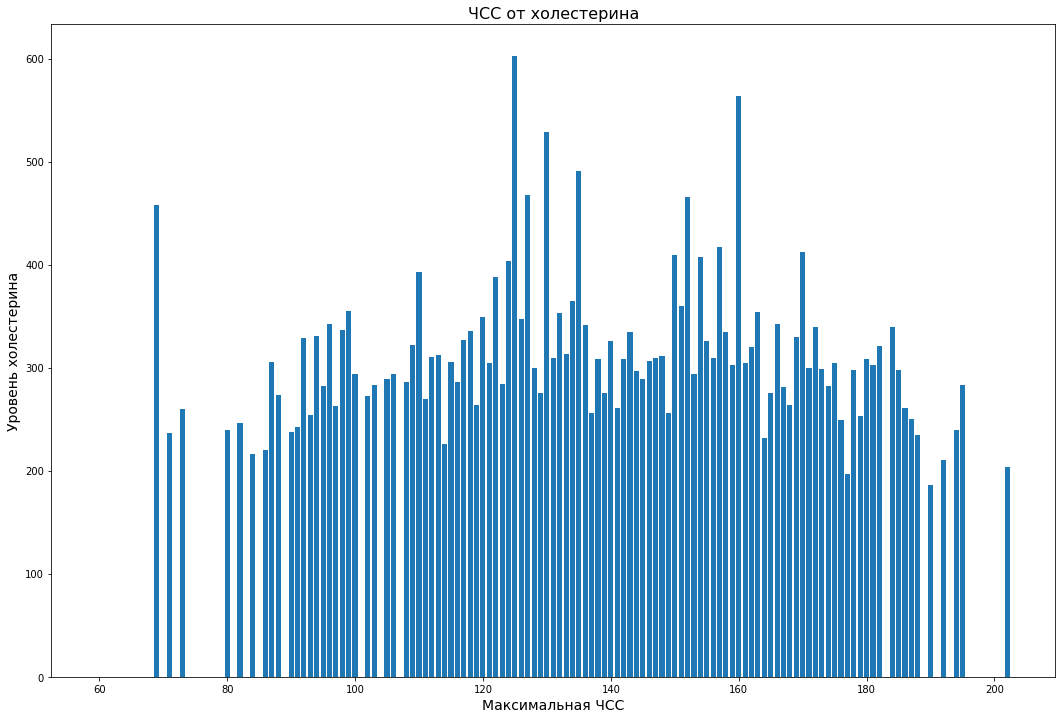

In [68]:
plt.bar(data['MaxHR'], data['Cholesterol'])
plt.title('ЧСС от холестерина', fontsize=16)
plt.xlabel('Максимальная ЧСС', fontsize=14)
plt.ylabel('Уровень холестерина', fontsize=14)

plt.show()

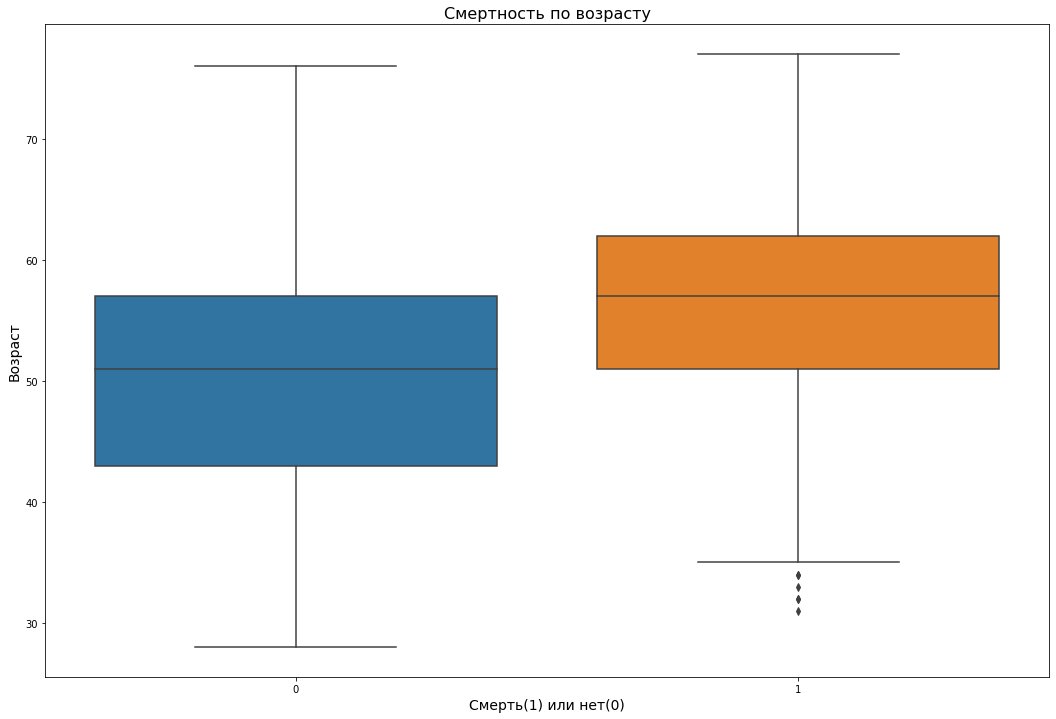

In [75]:
Disease = data['HeartDisease'].value_counts().sort_values(ascending=False).head(10).index.values
sns.boxplot(x='HeartDisease', y='Age', 
            data=data[data['HeartDisease'].isin(Disease)])
plt.title('Смертность по возрасту', fontdict={'size':16})
plt.xlabel('Смерть(1) или нет(0)', fontdict={'size':14})
plt.ylabel('Возраст', fontdict={'size':14})

plt.show()

### 3. Разделите выборку на обучающее и тестовое подмножество. 80% данных оставить на обучающее множество, 20% на тестовое.


In [34]:
X = data.loc[:, data.columns != 'HeartDisease']
y = data['HeartDisease']

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

### 4. Обучите дерево решений на обучающем множестве. Используйте следующие модели:
a) tree.DecisionTreeClassifier


In [37]:
from sklearn.tree import DecisionTreeClassifier

In [44]:
clf = DecisionTreeClassifier(random_state=13)
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=13)

b) ensemble.RandomForestClassifier


In [39]:
from sklearn.ensemble import RandomForestClassifier

In [45]:
rfc = RandomForestClassifier(random_state=13)
rfc.fit(X_train, y_train)

RandomForestClassifier(random_state=13)

### 5. Для тестового множества сделайте предсказание целевой переменной. Выведите метрики для каждой построенной модели с помощью metrics.classification_report.


In [46]:
from sklearn.metrics import classification_report

In [55]:
# tree.DecisionTreeClassifier
clf_y_pred = clf.predict(X_test)
print(classification_report(y_test, clf_y_pred, target_names=['Class 0', 'Class 1']))

              precision    recall  f1-score   support

     Class 0       0.69      0.82      0.75        83
     Class 1       0.83      0.70      0.76       101

    accuracy                           0.76       184
   macro avg       0.76      0.76      0.76       184
weighted avg       0.77      0.76      0.76       184



In [56]:
# ensemble.RandomForestClassifier
rfc_y_pred = rfc.predict(X_test)
print(classification_report(y_test, rfc_y_pred, target_names=['Class 0', 'Class 1']))

              precision    recall  f1-score   support

     Class 0       0.85      0.89      0.87        83
     Class 1       0.91      0.87      0.89       101

    accuracy                           0.88       184
   macro avg       0.88      0.88      0.88       184
weighted avg       0.88      0.88      0.88       184



### 6. Выведите важность признаков, полученную после обучения модели из п. 4b в виде столбчатой диаграммы. Отсортируйте важность по убыванию.


In [60]:
feat_imp = pd.Series(rfc.feature_importances_)
feat_imp.index = pd.Series(X_train.columns)
feat_imp = feat_imp.sort_values(ascending=False)

In [61]:
feat_imp

ST_Slope_Up          0.147520
ChestPainType_ASY    0.096400
MaxHR                0.096193
Cholesterol          0.093563
ST_Slope_Flat        0.088865
Oldpeak              0.086066
Age                  0.076891
RestingBP            0.073465
ExerciseAngina_N     0.046215
ExerciseAngina_Y     0.041194
FastingBS            0.029217
Sex_M                0.023881
Sex_F                0.021410
ChestPainType_ATA    0.019876
RestingECG_LVH       0.014271
ChestPainType_NAP    0.012506
RestingECG_ST        0.009800
RestingECG_Normal    0.009742
ChestPainType_TA     0.006467
ST_Slope_Down        0.006460
dtype: float64

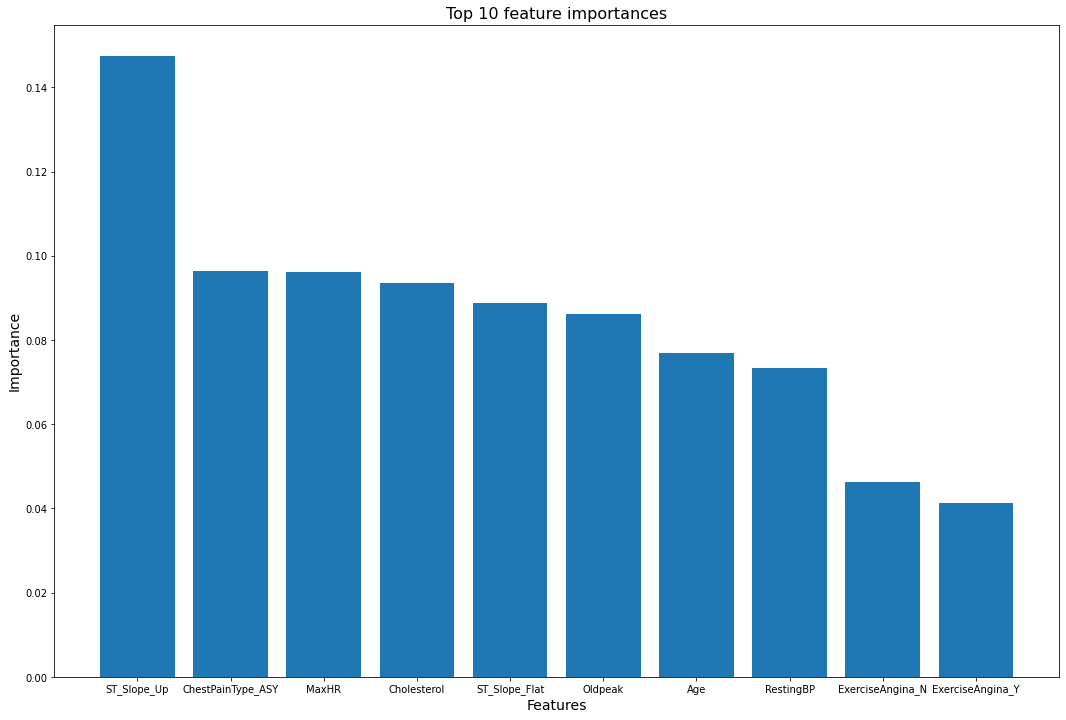

In [76]:
plt.title('Top 10 feature importances', fontsize = 16)
plt.xlabel('Features', fontsize = 14)
plt.ylabel('Importance', fontsize = 14)
plt.bar(feat_imp.head(10).index, feat_imp.head(10))
plt.show()

### 7. Обучите бэггинг над моделью из п. 4a. Используйте ensemble.BaggingClassifier.



In [77]:
from sklearn.ensemble import  BaggingClassifier

In [81]:
bagging = BaggingClassifier(clf,
                           n_estimators=10,
                           max_samples=0.5,
                           max_features=0.5,
                           random_state=13)

bagging.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=13),
                  max_features=0.5, max_samples=0.5, random_state=13)

a) Повторите п. 5

In [83]:
bagg_y_pred = bagging.predict(X_test)
print(classification_report(y_test, bagg_y_pred, target_names=['Class 0', 'Class 1']))

              precision    recall  f1-score   support

     Class 0       0.79      0.87      0.83        83
     Class 1       0.88      0.81      0.85       101

    accuracy                           0.84       184
   macro avg       0.84      0.84      0.84       184
weighted avg       0.84      0.84      0.84       184



### 8. Обучите стекинг трех моделей: из п. 4a, п. 4b и svm.LinearSVC. Используйте ensemble.StackingClassifier.

In [99]:
from sklearn.svm import LinearSVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import RidgeCV

In [110]:
# LinearSVC
L_SVC = make_pipeline(StandardScaler(),
                      LinearSVC(random_state=13, tol=1e-5))
L_SVC.fit(X, y)

D:\DataSci\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearsvc', LinearSVC(random_state=13, tol=1e-05))])

In [111]:
# StackingClassifier
Classifier = StackingClassifier(
    [
        ('DecisionTreeClassifier', clf),
        ('RandomForestClassifier', rfc),
        ('LinearSVC', L_SVC)
    ])

In [112]:
Classifier.fit(X_train, y_train)

D:\DataSci\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
D:\DataSci\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
D:\DataSci\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
D:\DataSci\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
D:\DataSci\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("L

StackingClassifier(estimators=[('DecisionTreeClassifier',
                                DecisionTreeClassifier(random_state=13)),
                               ('RandomForestClassifier',
                                RandomForestClassifier(random_state=13)),
                               ('LinearSVC',
                                Pipeline(steps=[('standardscaler',
                                                 StandardScaler()),
                                                ('linearsvc',
                                                 LinearSVC(random_state=13,
                                                           tol=1e-05))]))])

a) Повторите п. 5

In [116]:
calss_y_pred = Classifier.predict(X_test)
print(classification_report(y_test, calss_y_pred, target_names=['Class 0', 'Class 1']))

              precision    recall  f1-score   support

     Class 0       0.88      0.88      0.88        83
     Class 1       0.90      0.90      0.90       101

    accuracy                           0.89       184
   macro avg       0.89      0.89      0.89       184
weighted avg       0.89      0.89      0.89       184



### 9. Сформулируйте выводы по проделанной работе.
a) Сравните метрики построенных моделей.


In [121]:
print(classification_report(y_test, clf_y_pred, target_names=['Class 0', 'Class 1']))
print(classification_report(y_test, rfc_y_pred, target_names=['Class 0', 'Class 1']))
print(classification_report(y_test, bagg_y_pred, target_names=['Class 0', 'Class 1']))
print(classification_report(y_test, calss_y_pred, target_names=['Class 0', 'Class 1']))

              precision    recall  f1-score   support

     Class 0       0.69      0.82      0.75        83
     Class 1       0.83      0.70      0.76       101

    accuracy                           0.76       184
   macro avg       0.76      0.76      0.76       184
weighted avg       0.77      0.76      0.76       184

              precision    recall  f1-score   support

     Class 0       0.85      0.89      0.87        83
     Class 1       0.91      0.87      0.89       101

    accuracy                           0.88       184
   macro avg       0.88      0.88      0.88       184
weighted avg       0.88      0.88      0.88       184

              precision    recall  f1-score   support

     Class 0       0.79      0.87      0.83        83
     Class 1       0.88      0.81      0.85       101

    accuracy                           0.84       184
   macro avg       0.84      0.84      0.84       184
weighted avg       0.84      0.84      0.84       184

              preci

Лучше всего справились Random Forrest и Stacking, чуть хуже Bagging и меньшие метрики у Decision three

b) Напишите свое мнение, какая модель наилучшая и почему.

Stacking - наивысшие показатели метрик